In [231]:
%load_ext autoreload
%autoreload 2
import pickle
from astropy.table import QTable
from astropy import units as u
from astropy.nddata import NDData, StdDevUncertainty
import numpy as np
from matplotlib import pyplot as plt


from nfw_profile_heating import NFWProfile
from statistics_functions import chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# import datasets
with open('data/mcxc_psz_combined.pkl', 'rb') as f:
    comb_data = pickle.load(f)
with open('data/REFLEX.p', 'rb') as g:
    errors_dict = pickle.load(g)

In [41]:
errors_dict


{'RXCJ0003.1-0605': 0.6179094419486882,
 'RXCJ0003.2-3555': 0.07247964293288481,
 'RXCJ0003.8+0203': 0.14703710320470523,
 'RXCJ0006.0-3443': 0.22761947095956642,
 'RXCJ0011.3-2851': 0.09295868677236488,
 'RXCJ0013.6-1930': 0.13354210223189258,
 'RXCJ0014.3-3023': 1.7293412740877763,
 'RXCJ0014.3-6604': 0.3376996999677323,
 'RXCJ0017.5-3509': 0.1323933419454966,
 'RXCJ0020.7-2542': 0.3062061422609284,
 'RXCJ0025.5-3302': 0.04639701540882626,
 'RXCJ0027.3-5015': 0.33035779817579547,
 'RXCJ0028.6-2338': 0.1762232582198019,
 'RXCJ0040.1-5607': 0.013688862424430896,
 'RXCJ0041.8-0918': 0.1641047451727569,
 'RXCJ0042.1-2832': 0.24537675727894,
 'RXCJ0043.4-2037': 0.8483302244986201,
 'RXCJ0049.4-2931': 0.21505671067355567,
 'RXCJ0052.7-8015': 0.6783457890981536,
 'RXCJ0056.3-0112': 0.07848718985966151,
 'RXCJ0057.8-6648': 0.2536801907396271,
 'RXCJ0102.7-2152': 0.0925488665939969,
 'RXCJ0105.5-2439': 0.6647784187183639,
 'RXCJ0106.8-0229': 0.5185702798856171,
 'RXCJ0107.8-3643': 0.148150670

In [36]:
keys = reflex_appended['OName'].tolist()
print(all(key in errors_dict for key in keys))
missing_keys = [key for key in keys if key not in errors_dict]
print(missing_keys)
print(len(missing_keys))
# could not find errors for 37 clusters

False
['RXCJ0034.6-0208', 'RXCJ0217.2-5244', 'RXCJ0220.9-3829', 'RXCJ0229.3-3332', 'RXCJ0232.2-4420', 'RXCJ0303.7-7752', 'RXCJ0331.1-2100', 'RXCJ0413.9-3805', 'RXCJ0437.1+0043', 'RXCJ0501.6+0110', 'RXCJ0510.7-0801', 'RXCJ0528.2-2942', 'RXCJ0532.9-3701', 'RXCJ0616.8-4748', 'RXCJ0631.3-5610', 'RXCJ0738.1-7506', 'RXCJ1013.5-1350', 'RXCJ1038.4-2454', 'RXCJ1115.8+0129', 'RXCJ1206.2-0848', 'RXCJ1215.4-3900', 'RXCJ1314.4-2515', 'RXCJ1317.1-3821', 'RXCJ1347.5-1144', 'RXCJ1504.1-0248', 'RXCJ1514.9-1523', 'RXCJ1558.3-1410', 'RXCJ1855.8-6654', 'RXCJ1947.3-7623', 'RXCJ2003.5-2323', 'RXCJ2014.8-2430', 'RXCJ2023.4-5535', 'RXCJ2030.7-3532', 'RXCJ2031.8-4037', 'RXCJ2125.2-0657', 'RXCJ2218.8-0258', 'RXCJ2344.2-0422']
37


In [46]:
reflex_data = comb_data[comb_data['Sub-Cat']=='REFLEX']
reflex_appended = reflex_data.copy()
reflex_appended['L_err'] = reflex_appended['OName'].apply(lambda x: errors_dict.get(x))
reflex_clean = reflex_appended[reflex_appended['L_err'].notna()]
reflex_clean

,MCXC,OName,AName,Ah Am RAs Ed Em Es,RAdeg DEdeg,GLON GLAT,z_x,Cat,Sub-Cat,Scale,...,E_MSZ,e_MSZ,RedMAPPer,ACT,SPT,ISE,AMIevi,O,Comment,L_err
1,J0003.1-0605,RXCJ0003.1-0605,A2697,0 3 11.8 - 6 5 10,0.799 -6.086,92.169 -66.033,0.2320,NORAS/REFLEX,REFLEX,3.698,...,0.368165,0.369144,RMJ000311.6-060530.1,,,-10,-1000.0,1,NaN,0.617909
2,J0003.8+0203,RXCJ0003.8+0203,A2700,0 3 50.6 + 2 3 48,0.961 2.063,99.610 -58.637,0.0924,NORAS/REFLEX,REFLEX,1.719,...,0.282160,0.301448,RMJ000349.7+020359.3,,,-10,-1000.0,0,NaN,0.147037
3,J0006.0-3443,RXCJ0006.0-3443,A2721,0 6 3.0 -34 43 27,1.513 -34.724,352.147 -77.668,0.1147,NORAS/REFLEX,REFLEX,2.080,...,0.248869,0.226974,,,,-10,-1000.0,1,NaN,0.227619
6,J0011.3-2851,RXCJ0011.3-2851,A2734,0 11 20.7 -28 51 18,2.836 -28.855,19.562 -80.986,0.0620,NORAS/REFLEX,REFLEX,1.195,...,0.182667,0.188038,,,,-10,-1000.0,1,NaN,0.092959
9,J0013.6-1930,RXCJ0013.6-1930,A0013,0 13 38.3 -19 30 8,3.409 -19.502,72.276 -78.456,0.0940,NORAS/REFLEX,REFLEX,1.746,...,0.233331,0.245311,,,,-10,-1000.0,1,NaN,0.133542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,J2347.7-2808,RXCJ2347.7-2808,A4038,23 47 43.2 -28 8 29,356.930 -28.141,25.139 -75.862,0.0300,NORAS/REFLEX,REFLEX,0.601,...,0.114748,0.107849,,,,-10,-1000.0,1,NaN,0.038488
546,J2351.6-2605,RXCJ2351.6-2605,A2667,23 51 40.7 -26 5 1,357.919 -26.084,34.017 -76.609,0.2264,NORAS/REFLEX,REFLEX,3.631,...,0.365168,0.382711,,,,-10,-1000.0,1,NaN,0.993468
547,J2354.2-1024,RXCJ2354.2-1024,A2670,23 54 13.4 -10 24 46,358.556 -10.413,81.334 -68.530,0.0765,NORAS/REFLEX,REFLEX,1.450,...,0.216913,0.225417,RMJ235413.7-102508.5,,,-10,-1000.0,1,NaN,0.151354
549,J2357.0-3445,RXCJ2357.0-3445,A4059,23 57 2.3 -34 45 38,359.260 -34.761,356.359 -76.082,0.0475,NORAS/REFLEX,REFLEX,0.931,...,0.163126,0.149009,,,,-10,-1000.0,1,NaN,0.091267


In [234]:
reflex_clean['E_MSZ'].head(), reflex_clean['e_MSZ'].head, reflex_clean['MSZ'].head()

(1    0.368165
 2    0.282160
 3    0.248869
 6    0.182667
 9    0.233331
 Name: E_MSZ, dtype: float64,
 <bound method NDFrame.head of 1      0.369144
 2      0.301448
 3      0.226974
 6      0.188038
 9      0.245311
          ...   
 543    0.107849
 546    0.382711
 547    0.225417
 549    0.149009
 550    0.240743
 Name: e_MSZ, Length: 188, dtype: float64>,
 1    5.957353
 2    2.238774
 3    4.001657
 6    2.606369
 9    2.756623
 Name: MSZ, dtype: float64)

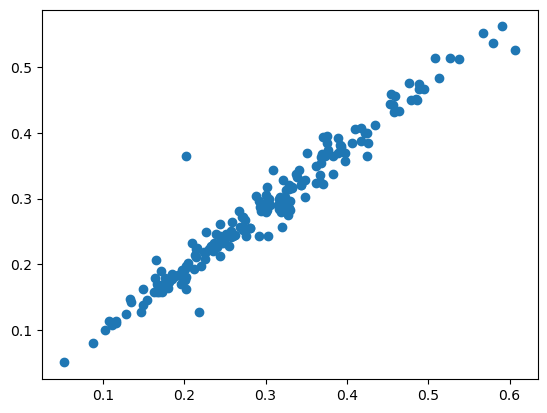

In [240]:
plt.scatter(reflex_clean['e_MSZ'], reflex_clean['E_MSZ'])

Text(0.5, 0, 'M500 (1e14 Msun)')

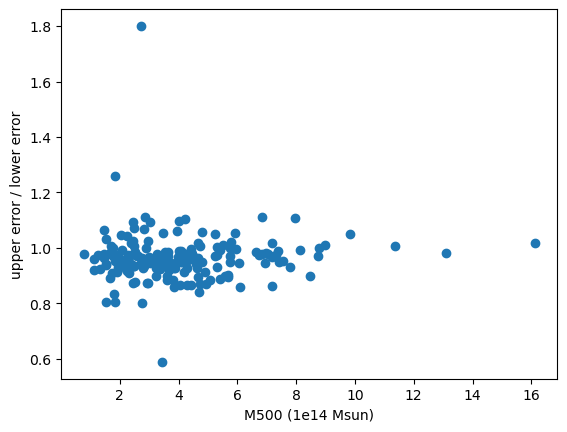

In [242]:
plt.scatter(reflex_clean['MSZ'], reflex_clean['E_MSZ']/reflex_clean['e_MSZ'])
plt.ylabel('upper error / lower error')
plt.xlabel('M500 (1e14 Msun)')

Text(0.5, 0, 'upper error / lower error')

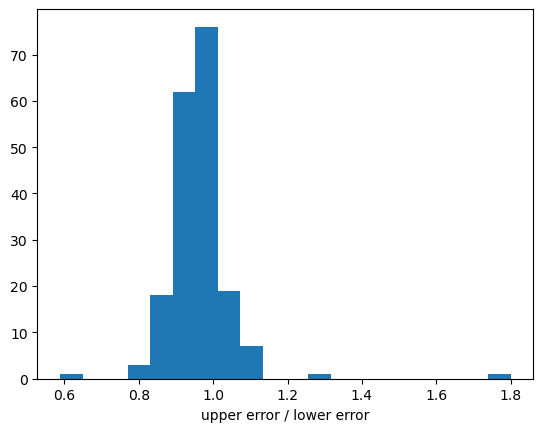

In [246]:
plt.hist(reflex_clean['E_MSZ']/reflex_clean['e_MSZ'], bins=20)
plt.xlabel('upper error / lower error')

In [47]:
L_err_list = reflex_clean['L_err'].tolist()
L_err_list

[0.6179094419486882,
 0.14703710320470523,
 0.22761947095956642,
 0.09295868677236488,
 0.13354210223189258,
 0.3376996999677323,
 1.7293412740877763,
 0.3062061422609284,
 0.04639701540882626,
 0.33035779817579547,
 0.1762232582198019,
 0.1641047451727569,
 0.24537675727894,
 0.8483302244986201,
 0.07848718985966151,
 0.0925488665939969,
 0.6647784187183639,
 0.04290117582179534,
 0.014446791901477143,
 0.04427524236779236,
 0.5714405637181501,
 0.05943654764724139,
 0.5045482838885549,
 0.2867256713699702,
 0.4436884192992519,
 0.2681984406120019,
 0.5796597097222473,
 0.09100651536661837,
 0.46449603444193566,
 0.8790525964936597,
 0.1551347321172641,
 0.09000598818961687,
 0.14363824973439615,
 0.05694014240691957,
 0.10325761146446225,
 0.06122966248764443,
 0.5496809384801187,
 0.18113312845470247,
 0.0935051826076239,
 0.06905150366042391,
 0.0946826534929151,
 0.058054929209745254,
 0.06957019099946796,
 0.06425621151153069,
 0.09946722237715844,
 0.08716212177329971,
 0.292404

In [263]:
def generate_nfws_from_combined_dataset(dataset, nrows=None):
    cls_data={'M500':dataset['MSZ'],
          'L500':dataset['L500'],
          'z':dataset['z_y'] # take z from Planck
         }
    units={
        'M500': 1e14*u.Msun,
        'L500': 1e37*u.W,
        'z': None
    }
    
    M500_err_up = np.array(dataset['E_MSZ']) 
    M500_err_lo = np.array(dataset['e_MSZ'])
    
    M500_err_sym = [(upper + lower) / 2 for lower, upper in zip(M500_err_lo, M500_err_up)]
    
    uncertainties = {
        'M500':StdDevUncertainty(M500_err_sym)
    }

    cls_table=QTable(cls_data, units=units)
    cls_table['M500'].uncertainty = uncertainties['M500']
    
    n=nrows or len(cls_table)
    
    return [
        NFWProfile(
            cls_table['z'][i],
            M500=cls_table['M500'][i],
            L500=cls_table['L500'][i],
            M500_uncertainty=uncertainties['M500'][i]

        )
        for i in range(n)
    ]

In [264]:
nfws_werr = generate_nfws_from_combined_dataset(reflex_clean)

In [267]:
n = nfws_werr[0]
n.M500, n.M500.std_dev

(<Quantity 5.957353 1e+14 solMass>, 0.3686545)

In [277]:
M500 = n.M500
calc = 2*M500
calc.uncertainty

AttributeError: 'Quantity' object has no 'uncertainty' member

In [62]:
nfws = generate_nfws_from_combined_dataset(reflex_clean)
L_obs = [nfw.L500.to(u.erg/u.s) for nfw in nfws]

In [63]:
L_obs

[<Quantity 6.107094e+44 erg / s>,
 <Quantity 8.46881e+43 erg / s>,
 <Quantity 1.809494e+44 erg / s>,
 <Quantity 1.086002e+44 erg / s>,
 <Quantity 1.236332e+44 erg / s>,
 <Quantity 2.827248e+44 erg / s>,
 <Quantity 1.1818114e+45 erg / s>,
 <Quantity 2.872451e+44 erg / s>,
 <Quantity 4.9467e+43 erg / s>,
 <Quantity 2.164603e+44 erg / s>,
 <Quantity 1.404549e+44 erg / s>,
 <Quantity 5.100085e+44 erg / s>,
 <Quantity 2.734146e+44 erg / s>,
 <Quantity 6.907787e+44 erg / s>,
 <Quantity 1.437223e+44 erg / s>,
 <Quantity 1.460216e+44 erg / s>,
 <Quantity 5.160525e+44 erg / s>,
 <Quantity 4.91051e+43 erg / s>,
 <Quantity 1.81484e+43 erg / s>,
 <Quantity 4.67516e+43 erg / s>,
 <Quantity 4.979596e+44 erg / s>,
 <Quantity 7.63259e+43 erg / s>,
 <Quantity 5.701343e+44 erg / s>,
 <Quantity 2.010759e+44 erg / s>,
 <Quantity 4.237381e+44 erg / s>,
 <Quantity 1.768408e+44 erg / s>,
 <Quantity 6.076038e+44 erg / s>,
 <Quantity 6.69697e+43 erg / s>,
 <Quantity 3.639374e+44 erg / s>,
 <Quantity 6.258801e+

In [75]:
variances = (np.array(L_err_list)*1e37*u.W).to(1e44*u.erg/u.s)

In [76]:
len(nfws), len(L_err_list)

(188, 188)

In [67]:
L_err_list

[0.6179094419486882,
 0.14703710320470523,
 0.22761947095956642,
 0.09295868677236488,
 0.13354210223189258,
 0.3376996999677323,
 1.7293412740877763,
 0.3062061422609284,
 0.04639701540882626,
 0.33035779817579547,
 0.1762232582198019,
 0.1641047451727569,
 0.24537675727894,
 0.8483302244986201,
 0.07848718985966151,
 0.0925488665939969,
 0.6647784187183639,
 0.04290117582179534,
 0.014446791901477143,
 0.04427524236779236,
 0.5714405637181501,
 0.05943654764724139,
 0.5045482838885549,
 0.2867256713699702,
 0.4436884192992519,
 0.2681984406120019,
 0.5796597097222473,
 0.09100651536661837,
 0.46449603444193566,
 0.8790525964936597,
 0.1551347321172641,
 0.09000598818961687,
 0.14363824973439615,
 0.05694014240691957,
 0.10325761146446225,
 0.06122966248764443,
 0.5496809384801187,
 0.18113312845470247,
 0.0935051826076239,
 0.06905150366042391,
 0.0946826534929151,
 0.058054929209745254,
 0.06957019099946796,
 0.06425621151153069,
 0.09946722237715844,
 0.08716212177329971,
 0.292404

In [191]:
#TODO: update with mass
def log_lik(p0, obs, variances, nfws):
    log_s0 = p0
    s0 = 10**log_s0*u.cm**2
    mx = 1e-2*u.GeV
    # prior
    if log_s0>0:
        return -np.inf
    # calculate model predicted L500
    predicted = [nfw.solve_for_L500(s0, mx) for nfw in nfws]
    X2 = chi_squared(predicted, obs, variances)
    return -X2/2

In [196]:
#TODO: update with mass
def log_lik_analytic(p0, obs, variances, nfws):
    log_s0 = p0
    s0 = 10**log_s0*u.cm**2
    mx = 1e-2*u.GeV
    # prior
    if log_s0>0:
        return -np.inf
    # calculate model predicted L500
    predicted = [nfw.L500_analytic(s0, mx) for nfw in nfws]
    X2 = chi_squared(predicted, obs, variances)
    return -X2/2

In [192]:
nfws_subset = nfws[:10]
vars_subset = variances[:10]
obs_subset = L_obs[:10]

In [90]:
log_lik(-25, obs_subset, vars_subset, nfws_subset)

<Quantity -4.1911408e+09>

In [193]:
loglik25 = log_lik(-25, obs_subset, vars_subset, nfws)

In [195]:
loglik25

<Quantity -7.65606582e+08>

In [194]:
loglik30 = log_lik(-30, obs_subset, vars_subset, nfws)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_36342/1519101483.py", line 1, in <module>
    loglik30 = log_lik(-30, obs_subset, vars_subset, nfws)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_36342/2991501093.py", line 9, in log_lik
    predicted = [nfw.solve_for_L500(s0, mx) for nfw in nfws]
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_36342/2991501093.py", line 9, in <listcomp>
    predicted = [nfw.solve_for_L500(s0, mx) for nfw in nfws]
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/nfw_profile_heating.py", line 303, in solve_f

In [ ]:
loglik45 = log_lik(-45, obs_subset, vars_subset, nfws)

In [ ]:
plt.plot([-25, -30, -45], [loglik25, loglik30, loglik45])
plt.xlabel('log(sigma0/cm2)')
plt.ylabel('log likelihood')

In [206]:
loglikanalytic_25 = log_lik_analytic(-25, obs_subset, vars_subset, nfws)
loglikanalytic_30 = log_lik_analytic(-30, obs_subset, vars_subset, nfws)
loglikanalytic_35 = log_lik_analytic(-35, obs_subset, vars_subset, nfws)

In [208]:
loglikanalytic_40 = log_lik_analytic(-40, obs_subset, vars_subset, nfws)

In [215]:
loglikanalytic_27 = log_lik_analytic(-27, obs_subset, vars_subset, nfws)

In [219]:
loglikanalytic_26 = log_lik_analytic(-26, obs_subset, vars_subset, nfws)

In [221]:
loglikanalytic_255 = log_lik_analytic(-25.5, obs_subset, vars_subset, nfws)

In [223]:
loglikanalytic_2525 = log_lik_analytic(-25.25, obs_subset, vars_subset, nfws)

In [217]:
print(loglikanalytic_25, loglikanalytic_27, loglikanalytic_30, loglikanalytic_35, loglikanalytic_40)

-765606581.5791848 -353058.8963026114 -296521.0830511286 -296468.4831367364 -296468.4826107765


(-1000000.0, 0.0)

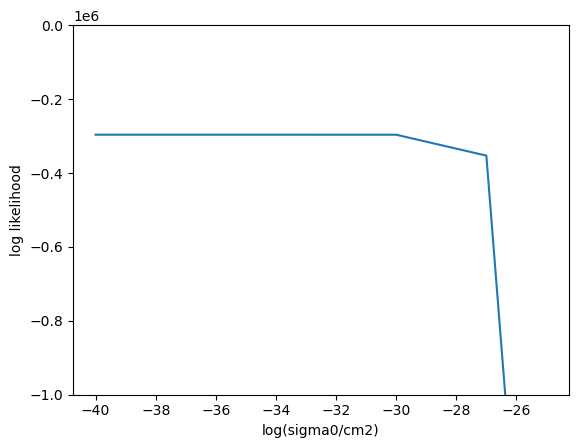

In [230]:
plt.plot([-25, -25.25, -25.5, -26, -27, -30, -35, -40], [loglikanalytic_25, loglikanalytic_2525, loglikanalytic_255, loglikanalytic_26, loglikanalytic_27, loglikanalytic_30, loglikanalytic_35, loglikanalytic_40])
plt.xlabel('log(sigma0/cm2)')
plt.ylabel('log likelihood')
plt.ylim(-1e6, 0)

In [204]:
s0 = 10**-25*u.cm**2
mx = 1e-2*u.GeV
nfws[10].solve_for_L500(s0, mx),nfws[10].L500_analytic(s0, mx)

62527969947.54077


(<Quantity 1.24432104e+46 erg / s>, <Quantity 1.24432104e+46 erg / s>)

In [203]:
nfws[10].get_Mbh()

<Quantity 1.137795e+10 solMass>

In [ ]:
m_chi=-2
ndim, nwalkers = 1, 5
p0=np.zeros((nwalkers, ndim ))
log_sigma0 = np.random.uniform(low=-50, high=-20, size=nwalkers).astype(np.float128)

In [99]:
[nfw.total_heating_rate(0.015*nfw.R500, nfw.R500, 0.1*nfw.R500) - nfw.total_cooling_rate(0.015*nfw.R500, nfw.R500) for nfw in nfws_subset]

[<Quantity -2.46469445e+45 erg / s>,
 <Quantity -4.75797028e+44 erg / s>,
 <Quantity -1.25733904e+45 erg / s>,
 <Quantity -5.85650092e+44 erg / s>,
 <Quantity -6.64821438e+44 erg / s>,
 <Quantity -7.38704695e+44 erg / s>,
 <Quantity -5.61264133e+45 erg / s>,
 <Quantity -1.36390867e+45 erg / s>,
 <Quantity -1.90605572e+44 erg / s>,
 <Quantity -1.03050447e+45 erg / s>]

In [133]:
Linj_bh = [nfw.get_Linj_from_L500() for nfw in nfws]
Linj_bh

[<Quantity 6.28951489e+44 erg / s>,
 <Quantity 2.96874235e+44 erg / s>,
 <Quantity 3.96160997e+44 erg / s>,
 <Quantity 3.26298921e+44 erg / s>,
 <Quantity 3.42776738e+44 erg / s>,
 <Quantity 4.69373195e+44 erg / s>,
 <Quantity 8.08292048e+44 erg / s>,
 <Quantity 4.72210891e+44 erg / s>,
 <Quantity 2.42013681e+44 erg / s>,
 <Quantity 4.24076041e+44 erg / s>,
 <Quantity 3.5980237e+44 erg / s>,
 <Quantity 5.87326258e+44 erg / s>,
 <Quantity 4.63438646e+44 erg / s>,
 <Quantity 6.59096183e+44 erg / s>,
 <Quantity 3.62960346e+44 erg / s>,
 <Quantity 3.65156049e+44 erg / s>,
 <Quantity 5.89961508e+44 erg / s>,
 <Quantity 2.41339333e+44 erg / s>,
 <Quantity 1.65332628e+44 erg / s>,
 <Quantity 2.36876873e+44 erg / s>,
 <Quantity 5.82014442e+44 erg / s>,
 <Quantity 2.85374613e+44 erg / s>,
 <Quantity 6.12733076e+44 erg / s>,
 <Quantity 4.12360263e+44 erg / s>,
 <Quantity 5.47390248e+44 erg / s>,
 <Quantity 3.92718481e+44 erg / s>,
 <Quantity 6.27734189e+44 erg / s>,
 <Quantity 2.71539975e+44 erg

In [139]:
Linj_Mvir = [nfw.Linj(0.3*nfw.R500) for nfw in nfws]
Linj_Mvir

[<Quantity 5.50500566e+45 erg / s>,
 <Quantity 1.00168218e+45 erg / s>,
 <Quantity 2.7800036e+45 erg / s>,
 <Quantity 1.31680214e+45 erg / s>,
 <Quantity 1.44548315e+45 erg / s>,
 <Quantity 1.68927625e+45 erg / s>,
 <Quantity 1.31982881e+46 erg / s>,
 <Quantity 3.09028284e+45 erg / s>,
 <Quantity 4.718873e+44 erg / s>,
 <Quantity 2.2310669e+45 erg / s>,
 <Quantity 1.51105667e+45 erg / s>,
 <Quantity 4.04311613e+45 erg / s>,
 <Quantity 2.36369482e+45 erg / s>,
 <Quantity 9.43899613e+45 erg / s>,
 <Quantity 2.1442554e+45 erg / s>,
 <Quantity 1.70678648e+45 erg / s>,
 <Quantity 5.05058818e+45 erg / s>,
 <Quantity 7.16663665e+44 erg / s>,
 <Quantity 3.10228158e+44 erg / s>,
 <Quantity 5.12224721e+44 erg / s>,
 <Quantity 5.06302993e+45 erg / s>,
 <Quantity 6.02601316e+44 erg / s>,
 <Quantity 1.02745171e+46 erg / s>,
 <Quantity 2.34616206e+45 erg / s>,
 <Quantity 2.37964803e+45 erg / s>,
 <Quantity 2.72056283e+45 erg / s>,
 <Quantity 5.72078928e+45 erg / s>,
 <Quantity 1.1998588e+45 erg / s>

In [210]:
# eddington luminosity
L_edds = [(10**(47.5) * u.erg/u.s * nfw.get_Mbh()/(10**(9.5)*u.Msun)).value for nfw in nfws]
L_edds

[1.9889192437054062e+48,
 9.387987615164317e+47,
 1.2527710707455218e+48,
 1.031847788058194e+48,
 1.0839552218684025e+48,
 1.4842883683155704e+48,
 2.5560438878496867e+48,
 1.4932619502849557e+48,
 7.6531445750597e+47,
 1.341046192037082e+48,
 1.1377949976675248e+48,
 1.85728870424574e+48,
 1.4655216770385097e+48,
 2.084245134467512e+48,
 1.1477813937459067e+48,
 1.1547248154830616e+48,
 1.8656220960313185e+48,
 7.63181980919868e+47,
 5.228276775175988e+47,
 7.49070444585663e+47,
 1.8404912690517036e+48,
 9.024337621687263e+47,
 1.937632116780656e+48,
 1.3039976480221756e+48,
 1.7309999513557006e+48,
 1.2418848782468928e+48,
 1.9850698029894252e+48,
 8.586847980360836e+47,
 1.6337670822552862e+48,
 2.0075512195770267e+48,
 6.594459842055971e+47,
 1.0103457719726119e+48,
 1.6634435417803115e+48,
 8.20220722310394e+47,
 1.1568686422924466e+48,
 1.0374839250560704e+48,
 1.7130530796191227e+48,
 9.27470648432732e+47,
 1.4717680697127274e+48,
 7.898647304662772e+47,
 1.0720436373792664e+48

In [179]:
sample_nfw = nfws[10]
print(sample_nfw.L500, sample_nfw.get_Mbh(), sample_nfw.get_Linj_from_L500())
print(sample_nfw.total_heating_rate(0.01*sample_nfw.R500, sample_nfw.R500, 0.1*sample_nfw.R500))
print(sample_nfw.total_cooling_rate(0.01*sample_nfw.R500, sample_nfw.R500))


1.404549 1e+37 W 11377949976.675247 solMass 3.598023702975347e+44 erg / s
4.025766519599298e+44 erg / s
1.0653557291590335e+45 erg / s


In [151]:
cooling_rates

[<Quantity 3.11043391e+45 erg / s>,
 <Quantity 7.76627378e+44 erg / s>,
 <Quantity 1.6619378e+45 erg / s>,
 <Quantity 9.16552146e+44 erg / s>,
 <Quantity 1.0127483e+45 erg / s>,
 <Quantity 1.21457214e+45 erg / s>,
 <Quantity 6.45693513e+45 erg / s>,
 <Quantity 1.84569167e+45 erg / s>,
 <Quantity 4.34864359e+44 erg / s>,
 <Quantity 1.46217804e+45 erg / s>,
 <Quantity 1.06535573e+45 erg / s>,
 <Quantity 2.05372358e+45 erg / s>,
 <Quantity 1.46708034e+45 erg / s>,
 <Quantity 4.9559737e+45 erg / s>,
 <Quantity 1.28019717e+45 erg / s>,
 <Quantity 1.0994017e+45 erg / s>,
 <Quantity 2.91327966e+45 erg / s>,
 <Quantity 5.87585863e+44 erg / s>,
 <Quantity 3.15745609e+44 erg / s>,
 <Quantity 4.5901218e+44 erg / s>,
 <Quantity 2.91041164e+45 erg / s>,
 <Quantity 5.18645869e+44 erg / s>,
 <Quantity 4.78456076e+45 erg / s>,
 <Quantity 1.47236424e+45 erg / s>,
 <Quantity 1.59215965e+45 erg / s>,
 <Quantity 1.70363018e+45 erg / s>,
 <Quantity 3.15521249e+45 erg / s>,
 <Quantity 8.82620267e+44 erg / s

In [182]:
heatings=[n.total_heating_rate(0.001*n.R500, 1*n.R500, rc=0.1*n.R500).value for n in nfws]

In [183]:
coolings = [n.total_cooling_rate(0.001*n.R500, 1*n.R500).value for n in nfws]

In [184]:
diff = np.subtract(heatings, coolings)
diff

array([-2.26832867e+45, -3.70580169e+44, -1.12703546e+45, -4.70622401e+44,
       -5.45069875e+44, -5.72486798e+44, -5.40691114e+45, -1.20671695e+45,
       -1.01614971e+44, -8.86235663e+44, -5.74578735e+44, -1.25473686e+45,
       -8.35675985e+44, -4.09566654e+45, -7.86754100e+44, -6.01022611e+44,
       -2.12335926e+45, -2.56970693e+44, -8.84737575e+43, -1.33199159e+44,
       -2.13154231e+45, -1.25602305e+44, -3.98481119e+45, -9.12644000e+44,
       -8.45427448e+44, -1.17448205e+45, -2.31512096e+45, -5.13222122e+44,
       -1.29474864e+45, -3.05130195e+45, -3.41225492e+44, -1.15166679e+44,
       -3.51179303e+44, -2.20052885e+44, -7.48010066e+44, -2.79626288e+45,
       -1.26129428e+45, -6.28415513e+44, -1.06189108e+45, -1.24246117e+44,
       -3.87296953e+44, -2.19023183e+44, -2.32062655e+45, -3.91657572e+44,
       -4.59656236e+44, -4.31622200e+44, -8.93019498e+44, -3.18296639e+45,
       -2.22085463e+44, -2.09731657e+45, -3.37678349e+44, -4.39236232e+45,
       -2.75895536e+44, -

Text(0, 0.5, 'agn heating - radiative cooling (erg/s)')

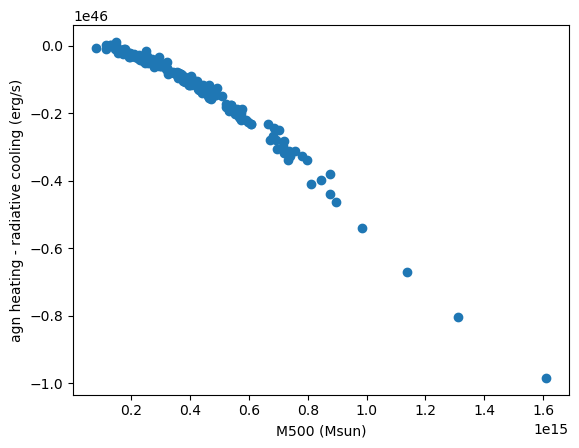

In [213]:
plt.scatter([nfw.M500.to(u.Msun).value for nfw in nfws], diff)
plt.xlabel('M500 (Msun)')
plt.ylabel('agn heating - radiative cooling (erg/s)')

In [212]:
np.median(heatings)

5.925750671569751e+44